Name:

Assignment: Experiment with Neural Networks

In [1]:
import numpy as np
from sklearn.datasets import load_iris # loads in the iris dataset
from sklearn.linear_model import Perceptron # imports the pereceptron model

iris = load_iris(as_frame=True) # loads the iris dataset as a data frame
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # selects the features for classification
y = (iris.target == 0)  # Iris setosa # creates a binary classification target

per_clf = Perceptron(random_state=42) # initializes a perceptron classifier
per_clf.fit(X, y) # fits the perceptron model to the data

X_new = [[2, 0.5], [3, 1]] # creates a new test data point
y_pred = per_clf.predict(X_new) # predicts wherther the new samples are iris setosa or not
print(y_pred) # prints the prediction

[ True False]


In [2]:
from sklearn.datasets import fetch_california_housing # loads the CA housing dataset
from sklearn.metrics import mean_squared_error # imports mse function to calc error
from sklearn.model_selection import train_test_split # imports function to split data into training and testing sets
from sklearn.neural_network import MLPRegressor # imports class for creating a multi layer perceptron regressor model
from sklearn.pipeline import make_pipeline # imports function to create a pipeline of data transformers and model fitters
from sklearn.preprocessing import StandardScaler # imports class for feature scaling

housing = fetch_california_housing() #loads the CA housing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split( # splits data into testing and training
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split( # further splits training data into training set and validation sets
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42) # specifies the architecutre of model with 3 hidden layers of 50 neurons each
pipeline = make_pipeline(StandardScaler(), mlp_reg) # creates a piepline that standardizes the input features
pipeline.fit(X_train, y_train) # trains the pipeline using the training data
y_pred = pipeline.predict(X_valid) # uses trained pipeline to predict on validation data
rmse = mean_squared_error(y_valid, y_pred, squared=False) #calcs the RMSE between target values and predicted values
print(rmse) # prints the calculated RMSE

0.5053326657968679


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
import tensorflow as tf # imports tensorflow library for deep learning

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data() # loads the fashion MNIST dataset, contains images of clothing and labels
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist # unpacks the data into training and testing sets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000] # creates training set but taking all but last 5000 samples
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:] # creates validation set by taking last 5000 samples

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape # returns the dimensions of the array which represents the shape of the trianing data {5000 samples, height in pixels, width in pixels}

(55000, 28, 28)

In [5]:
X_train.dtype # returns the data type of the elements in the array

dtype('uint8')

In [6]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255. # scales the datas features to a value between 1 and 0. Helps the model converge faster and prevents high values from dominanting the learning process

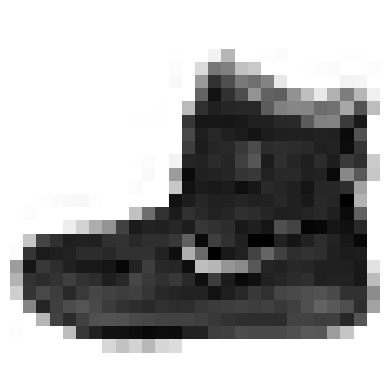

In [7]:
import matplotlib.pyplot as plt # imports matplotlib to plot

plt.imshow(X_train[0], cmap="binary") # displays the first image in the training dataset
plt.axis('off') # turns off axis ticks and labels
plt.show() # displays the image

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # creates the class names of the 10 clothing categories in dataset

In [9]:
class_names[y_train[0]] # provides the readable label of the category of the clothing article above

'Ankle boot'

In [10]:
tf.random.set_seed(42) # sets random seed for tensor flow
model = tf.keras.Sequential() # creates a model with a stack of layers that becomes the neural network
model.add(tf.keras.layers.Input(shape=[28, 28])) # adds an input layer to model which represents the dimension of images in pixels
model.add(tf.keras.layers.Flatten()) # flattens 2d image into 1d input
model.add(tf.keras.layers.Dense(300, activation="relu")) # 300 neurons in hidden layer with relu activation function
model.add(tf.keras.layers.Dense(100, activation="relu")) # adds anothe rlayer 100 neurons
model.add(tf.keras.layers.Dense(10, activation="softmax")) # add output lauer to the model which has 10 neurons for 10 categories
# this snipped creates a sequential NN model for classification

In [11]:
model.summary() # prints the models structure, output shape, and counts the parameters

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers # shows output showing the layers of the model

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
hidden1 = model.layers[1] # acesses layer at index 1
hidden1.name # displays the name of the layer at index 1

'dense'

In [14]:
model.get_layer('dense') is hidden1 # checks to see if the layer name dense is same object as Flatten layer

True

In [15]:
weights, biases = hidden1.get_weights() # unpacks the weights and biases of the hidden layer
weights

array([[-0.04393487, -0.011655  ,  0.02233084, ...,  0.0615045 ,
         0.03055134,  0.02611855],
       [-0.00412417,  0.00535437,  0.00278664, ...,  0.02187584,
        -0.02159037,  0.01959206],
       [-0.02174088, -0.06865028, -0.04489268, ..., -0.02117509,
        -0.02337397, -0.068302  ],
       ...,
       [ 0.06819792, -0.03544442, -0.03456778, ..., -0.01681119,
        -0.06965528, -0.07436682],
       [ 0.06728972, -0.02005594, -0.0741363 , ..., -0.00922633,
         0.01192491,  0.02656826],
       [ 0.01144042, -0.02839043, -0.02773395, ...,  0.01538838,
         0.02297366,  0.03451677]], dtype=float32)

In [16]:
weights.shape # returns the shape of the weights array

(784, 300)

In [17]:
biases # displays the biasses array which will be nothing because Flatten has no biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape # returns the shape of the biases array

(300,)

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]) # measures the error during trianing, uses gradient descent to update the weights, and uses accuracy to monitor model performance

In [20]:
history = model.fit(X_train, y_train, epochs=30,
...                     validation_data=(X_valid, y_valid)) # trains the keras model on 30 epochs or rounds, stores in in it history for later analysis

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6892 - loss: 0.9832 - val_accuracy: 0.8324 - val_loss: 0.4965
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8271 - loss: 0.5013 - val_accuracy: 0.8378 - val_loss: 0.4491
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8444 - loss: 0.4492 - val_accuracy: 0.8450 - val_loss: 0.4256
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8539 - loss: 0.4195 - val_accuracy: 0.8530 - val_loss: 0.4107
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8612 - loss: 0.3980 - val_accuracy: 0.8562 - val_loss: 0.3986
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8672 - loss: 0.3812 - val_accuracy: 0.8568 - val_loss: 0.3877
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8712 - loss: 0.3666 - val_accuracy: 0.8564 - val_loss: 0.3798
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8742 - loss: 0.3544

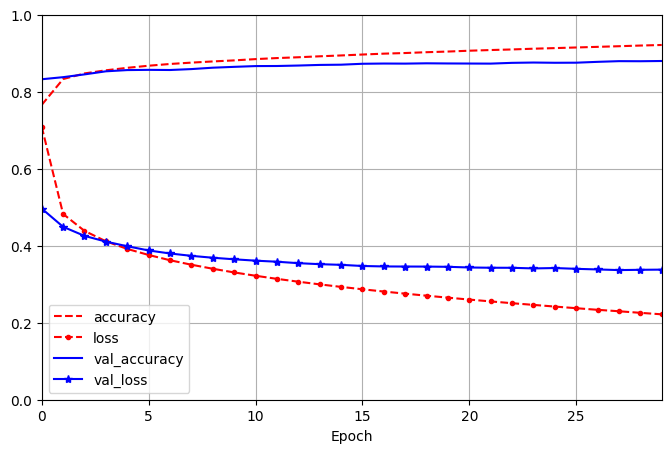

In [21]:
import matplotlib.pyplot as plt # imports matplotlib to plot
import pandas as pd # imports pandas library

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])# creates a pandas dataframe with history dictionary data including accuracy and validation
plt.show() # displays the dataframe

In [22]:
model.evaluate(X_test, y_test) #  model makes predictions on data, compares the labels, and calculates the metrics

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.3578


[0.35473787784576416, 0.8747000098228455]

In [23]:
X_new = X_test[:3] # selects 3 images as samples and creates a subset of test data
y_proba = model.predict(X_new) # preditcs probabilities on new subset
y_proba.round(2) # rounds predicted probs to 2 decimals

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.01, 0.  , 0.88],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
import numpy as np # imports numpy

y_pred = y_proba.argmax(axis=-1) # creates an array of predicted class labels for each of the 3 images
y_pred # displays array

array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred] # converts the number catergory to human readable catergory labels

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
housing = fetch_california_housing() # loads in CA housing dateset
X_train_full, X_test, y_train_full, y_test = train_test_split( # splits the data into training set
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split( # further splits training set into validation and trianing sets
    X_train_full, y_train_full, random_state=42)

In [27]:
tf.random.set_seed(42) # sets random seed for tf generator
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:]) # creates a normalization layer to standardize data
model = tf.keras.Sequential([ # creates a Keras model which has linear stack of layers
    norm_layer, # adds normalization layer
    tf.keras.layers.Dense(50, activation="relu"), # 3 dense layers with 50 neurons, layer 1
    tf.keras.layers.Dense(50, activation="relu"), # 3 dense layers with 50 neurons, layer 2
    tf.keras.layers.Dense(50, activation="relu"), # 3 dense layers with 50 neurons, layer 3
    tf.keras.layers.Dense(1) # dense layer with single neuron to output predicted house price
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3) # creates an adam optimizer instance with a learning rate of .001, used to train NN's
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"]) # uses MSE as loss function
norm_layer.adapt(X_train) # adapts normalization layer to training data
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid)) # trains model on training data for 20 epochs, specifies validation, and stores in "history"
mse_test, rmse_test = model.evaluate(X_test, y_test) # evaluates the trained model on the test data
X_new = X_test[:3] # selects first 3 samples and assigns to new variable
y_pred = model.predict(X_new) # uses trained model to make predictions on the 3 samples

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.3417 - loss: 1.9529 - val_RootMeanSquaredError: 0.6591 - val_loss: 0.4344
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 0.6535 - loss: 0.4280 - val_RootMeanSquaredError: 0.6670 - val_loss: 0.4449
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6110 - loss: 0.3738 - val_RootMeanSquaredError: 0.6335 - val_loss: 0.4013
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5936 - loss: 0.3526 - val_RootMeanSquaredError: 0.7973 - val_loss: 0.6357
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5814 - loss: 0.3383 - val_RootMeanSquaredError: 1.0127 - val_loss: 1.0255
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5725 - loss: 0.3279 - val_RootMeanSquaredError: 0.7217 - val_loss: 0.5209
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5649 - loss: 0.3192 -

In [28]:
rmse_test # shows the final perfomance of the trained model on the test data, output of .533 represents less than 1 std deviation difference off

0.5333129167556763